# Exploring Dandiset 001359: Patch-seq Recordings from Human Neurons (AIBS, 2025)

**DANDISET:** [20250331_AIBS_Patchseq_human (v0.250401.1603)](https://dandiarchive.org/dandiset/001359/0.250401.1603)

---

*This notebook was generated with the assistance of AI. Please review all code and results carefully before using them in your own research.*

---

## Overview

Dandiset `001359` contains multi-modal human neuron data, including Patch-seq (patch-clamp + transcriptomics) experiments performed at the Allen Institute for Brain Science. The main focus is the **multimodal classification of cell types in the human brain** using electrophysiological data and metadata.

**Key facts:**

- Species: *Homo sapiens* (human)
- Approach: Patch-clamp electrophysiology (voltage clamp, current clamp)
- Data format: NWB (Neurodata Without Borders)
- Number of NWB files (sessions): 391
- Number of subjects: 33
- Total file size: ~23.8 GB

See the [Dandiset page](https://dandiarchive.org/dandiset/001359/0.250401.1603) for more information.

## What This Notebook Covers

- Introduction to the Dandiset structure and contents
- How to use the DANDI API to browse and stream NWB assets
- Loading a sample NWB file directly from the archive
- Exploring metadata and structures in the NWB file
- Visualizing representative time series data and spike times

## Required Python Packages

- `dandi`
- `remfile`
- `h5py`
- `matplotlib`
- `pynwb`
- `numpy`

*Please ensure these packages are installed prior to running the notebook.*

---

Let's get started!


## 1. Explore the Dandiset: Listing Assets with the DANDI API

We will use the DANDI API to connect to the archive and list NWB files available in Dandiset 001359.


In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI archive and access the specific version of the Dandiset
dandiset_id = "001359"
dandiset_version = "0.250401.1603"
with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    # List a few NWB asset paths in the dandiset
    print("Sample assets in Dandiset 001359:")
    count = 0
    for asset in dandiset.get_assets():
        print(asset.path)
        count += 1
        if count >= 5:
            break

Sample assets in Dandiset 001359:
sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb
sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb
sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb
sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb
sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb


## 2. Load a Sample NWB File via Streaming

For demonstration, let's select one NWB file and walk through exploring its contents by streaming it remotely.

**Note:** Streaming avoids the need to download the entire file, which is efficient for large neuroscience datasets.


In [2]:
import remfile
import h5py
import pynwb

# We'll use a known file from the listing above as an example
sample_asset_path = "sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb"

with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    asset = next(dandiset.get_assets_by_glob(sample_asset_path))
    url = asset.download_url

# Open the remote file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, "r")
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

print(f"NWB session ID: {nwb.session_id}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Session start: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Acquisition keys: {list(nwb.acquisition.keys())[:5]} ...")
print(f"Stimulus keys: {list(nwb.stimulus.keys())[:5]} ...")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB session ID: 1207984257
Subject ID: 1203384279
Session start: 2022-09-07 17:13:04.880000+00:00
Institution: Allen Institute for Brain Science
Acquisition keys: ['data_00000_AD0', 'data_00001_AD0', 'data_00002_AD0', 'data_00003_AD0', 'data_00004_AD0'] ...
Stimulus keys: ['data_00000_DA0', 'data_00001_DA0', 'data_00002_DA0', 'data_00003_DA0', 'data_00004_DA0'] ...


## 3. Explore Metadata and Electrode Information

Let's inspect some basic metadata about the subject, electrode, and recording device.


In [3]:
# Show subject information
subject = nwb.subject
print("Subject info:")
print("  Age:", subject.age)
print("  Sex:", subject.sex)
print("  Species:", subject.species)
print("  Genotype:", subject.genotype)

# Explore electrode and device info
electrode_0 = nwb.icephys_electrodes["electrode_0"]
device = electrode_0.device
print("\nElectrode description:", electrode_0.description)
print("Device description:", device.description)

Subject info:
  Age: P21170.0D
  Sex: M
  Species: Homo sapiens
  Genotype: 

Electrode description: Headstage 0
Device description: Harvard Bioscience (formerly HEKA/Instrutech) Model: ITC18USB


## 4. Basic Visualization: Voltage Clamp Data Example

Let's plot a segment of voltage clamp data from the acquisition group. We'll also visualize the matching stimulus for the same sweep.


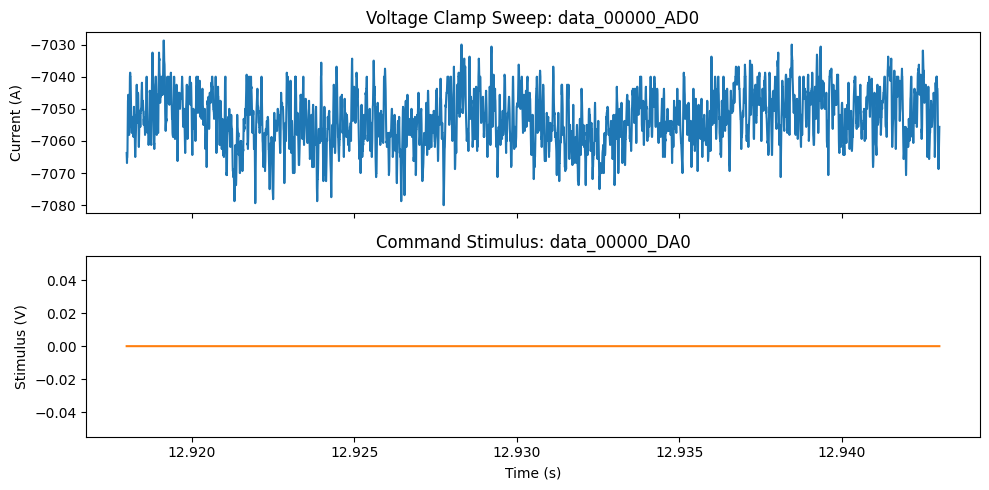

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get a voltage clamp series and its matching stimulus series
data_name = "data_00000_AD0"
stim_name = "data_00000_DA0"
vclamp = nwb.acquisition[data_name]
stim = nwb.stimulus[stim_name]

# Get a short segment to plot, to save memory
n_samples = 5000  # first 5000 points
v_data = vclamp.data[:n_samples]
s_data = stim.data[:n_samples]
rate = vclamp.rate  # in Hz
time = np.arange(n_samples) / rate + vclamp.starting_time

# Plot current response and the command stimulus
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
ax[0].plot(time, v_data, color="C0")
ax[0].set_ylabel("Current (A)")
ax[0].set_title(f"Voltage Clamp Sweep: {data_name}")

ax[1].plot(time, s_data, color="C1")
ax[1].set_ylabel("Stimulus (V)")
ax[1].set_xlabel("Time (s)")
ax[1].set_title(f"Command Stimulus: {stim_name}")

plt.tight_layout()
plt.show()

## 5. Basic Visualization: Current Clamp Data Segment

Let's also view a segment of a current clamp recording (membrane potential response).


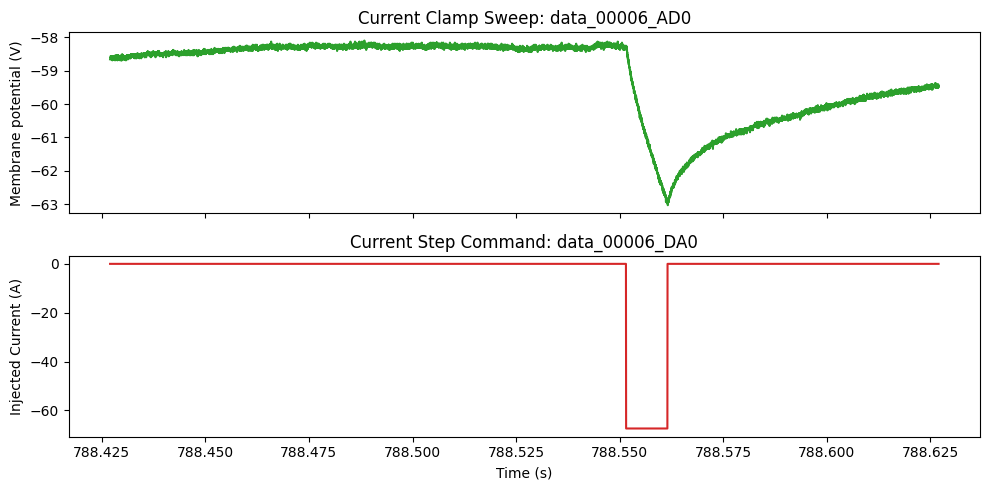

In [5]:
# Get a current clamp series and its stimulus
cc_name = "data_00006_AD0"
cc_stim_name = "data_00006_DA0"
cc_data = nwb.acquisition[cc_name]
cc_stim = nwb.stimulus[cc_stim_name]

n_cc_samples = 10000
v_m = cc_data.data[:n_cc_samples]
i_inj = cc_stim.data[:n_cc_samples]
rate_cc = cc_data.rate
t_cc = np.arange(n_cc_samples) / rate_cc + cc_data.starting_time

fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
ax[0].plot(t_cc, v_m, color="C2")
ax[0].set_ylabel("Membrane potential (V)")
ax[0].set_title(f"Current Clamp Sweep: {cc_name}")

ax[1].plot(t_cc, i_inj, color="C3")
ax[1].set_ylabel("Injected Current (A)")
ax[1].set_xlabel("Time (s)")
ax[1].set_title(f"Current Step Command: {cc_stim_name}")

plt.tight_layout()
plt.show()

## 6. Spike Detection Results: Exploring Processed Data

The NWB file includes spike detection results in the processing module named `"spikes"`. Let's extract spike times from a sweep with detected spikes and plot them over the voltage trace for visual verification.


Found spike sweep: Sweep_19, 12 spikes.
Spike times (s): [1.1886  1.22502 1.257   1.27972 1.30116 1.32368 1.3469  1.36998 1.39572
 1.42466 1.45246 1.4835 ]


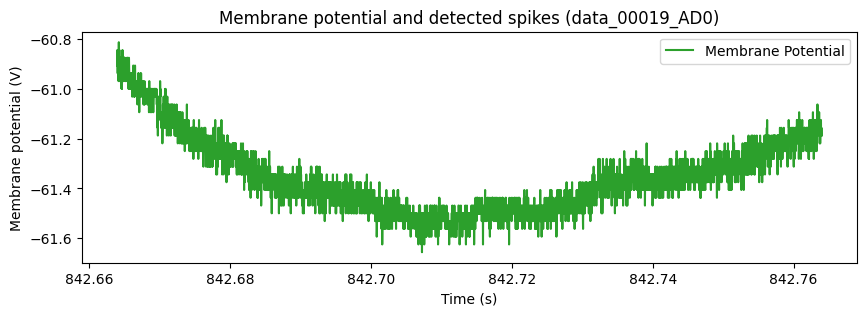

In [6]:
# Look for a sweep with nonzero spikes in the processing module
spikes_mod = nwb.processing["spikes"]
for key in spikes_mod.data_interfaces:
    sweep = spikes_mod.data_interfaces[key]
    if sweep.data.shape[0] > 0:
        print(f"Found spike sweep: {key}, {sweep.data.shape[0]} spikes.")
        break

spike_times = sweep.timestamps[:]
print(f"Spike times (s): {spike_times}")

# Overlay spike times on voltage trace for the same sweep if possible
# We'll use the corresponding current clamp sweep; often sweep number = part of name
cc_index = key.split("_")[-1]
try:
    cc_series_name = f"data_{int(cc_index):05}_AD0"
    vdata = nwb.acquisition[cc_series_name]
    v_segment = vdata.data[:5000]
    t_segment = np.arange(5000) / vdata.rate + vdata.starting_time

    plt.figure(figsize=(10, 3))
    plt.plot(t_segment, v_segment, label="Membrane Potential", color="C2")
    for st in spike_times:
        if t_segment[0] <= st <= t_segment[-1]:
            plt.axvline(st, color="r", alpha=0.7, linestyle='--', label="Detected Spike" if st == spike_times[0] else "")
    plt.xlabel("Time (s)")
    plt.ylabel("Membrane potential (V)")
    plt.title(f"Membrane potential and detected spikes ({cc_series_name})")
    plt.legend(loc="upper right")
    plt.show()
except Exception as e:
    print("Could not find corresponding current clamp sweep for spike overlay:", e)

## 7. Browse Experimental Epochs and Sweep Table

Experimental epochs and sweep organization can be explored for metadata-based slicing and analysis.


In [7]:
# Epochs example: list epoch start/stop and tags for the first few epochs
epochs_df = nwb.epochs.to_dataframe().head()
print("First few epochs:")
print(epochs_df[['start_time', 'stop_time', 'tags']])

# Sweeps example: show mapping between series and sweep numbers
sweeps_df = nwb.sweep_table.to_dataframe().head()
print("\nFirst few sweeps in sweep table:")
print(sweeps_df)

First few epochs:
    start_time  stop_time                                               tags
id                                                                          
1       12.918     12.963  [Type=Inserted Testpulse, SubType=Baseline, Sh...
2       12.918     13.018            [Type=Inserted Testpulse, ShortName=TP]
3       12.963     12.973  [Type=Inserted Testpulse, SubType=Pulse, Ampli...
4       12.973     13.018  [Type=Inserted Testpulse, SubType=Baseline, Sh...
5       13.018     13.518   [Name=Baseline Chunk, Index=0, ShortName=U_BLC0]

First few sweeps in sweep table:
                                               series  sweep_number
id                                                                 
0   [data_00000_AD0 pynwb.icephys.VoltageClampSeri...             0
1   [data_00000_DA0 pynwb.icephys.VoltageClampStim...             0
2   [data_00001_AD0 pynwb.icephys.VoltageClampSeri...             1
3   [data_00001_DA0 pynwb.icephys.VoltageClampStim...             1
4

## Summary & Next Steps

- This notebook provided a guided introduction to Dandiset 001359's contents and demonstrated how to load and visualize NWB-format Patch-seq data directly from the DANDI Archive.
- Researchers can use this workflow to efficiently query, browse, and analyze human neuron Patch-seq recordings for further research or meta-analysis.

**For deeper reanalysis**, consider iterating across assets, examining the full metadata, and extracting multimodal features (electrophysiological, transcriptomic, morphological) as needed for your project.

---

For more details, visit the [Dandiset page](https://dandiarchive.org/dandiset/001359/0.250401.1603) or consult the [Patch-seq protocol](https://www.protocols.io/view/patch-seq-recording-and-extraction-8epv51n45l1b/v3).